<a href="https://colab.research.google.com/github/mostafa-ja/Anomaly-detection/blob/main/BGL_embedding_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Pretrained Models

https://www.sbert.net/docs/pretrained_models.html



In [33]:
!wget 'https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/log2index'
!wget 'https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/reduced_index2embed'

--2023-09-06 07:16:48--  https://raw.githubusercontent.com/mostafa-ja/Anomaly-detection/main/datasets/BGL/log2index
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73231 (72K) [application/octet-stream]
Saving to: ‘log2index’

log2index           100%[===================>]  71.51K  --.-KB/s    in 0.01s   

2023-09-06 07:16:49 (4.76 MB/s) - ‘log2index’ saved [73231/73231]



In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

In [5]:
import json
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Json file name
with open('/content/reduced_index2embed') as f:
    embeddings = [json.loads(line) for line in f.readlines()]

embed = np.array(embeddings)
embed.shape

In [29]:
#we already did pca on our data just based on train's template , so we cant do again
logs_embeddings_2d = embed[:,:2]
print(logs_embeddings_2d.shape)

(736, 2)


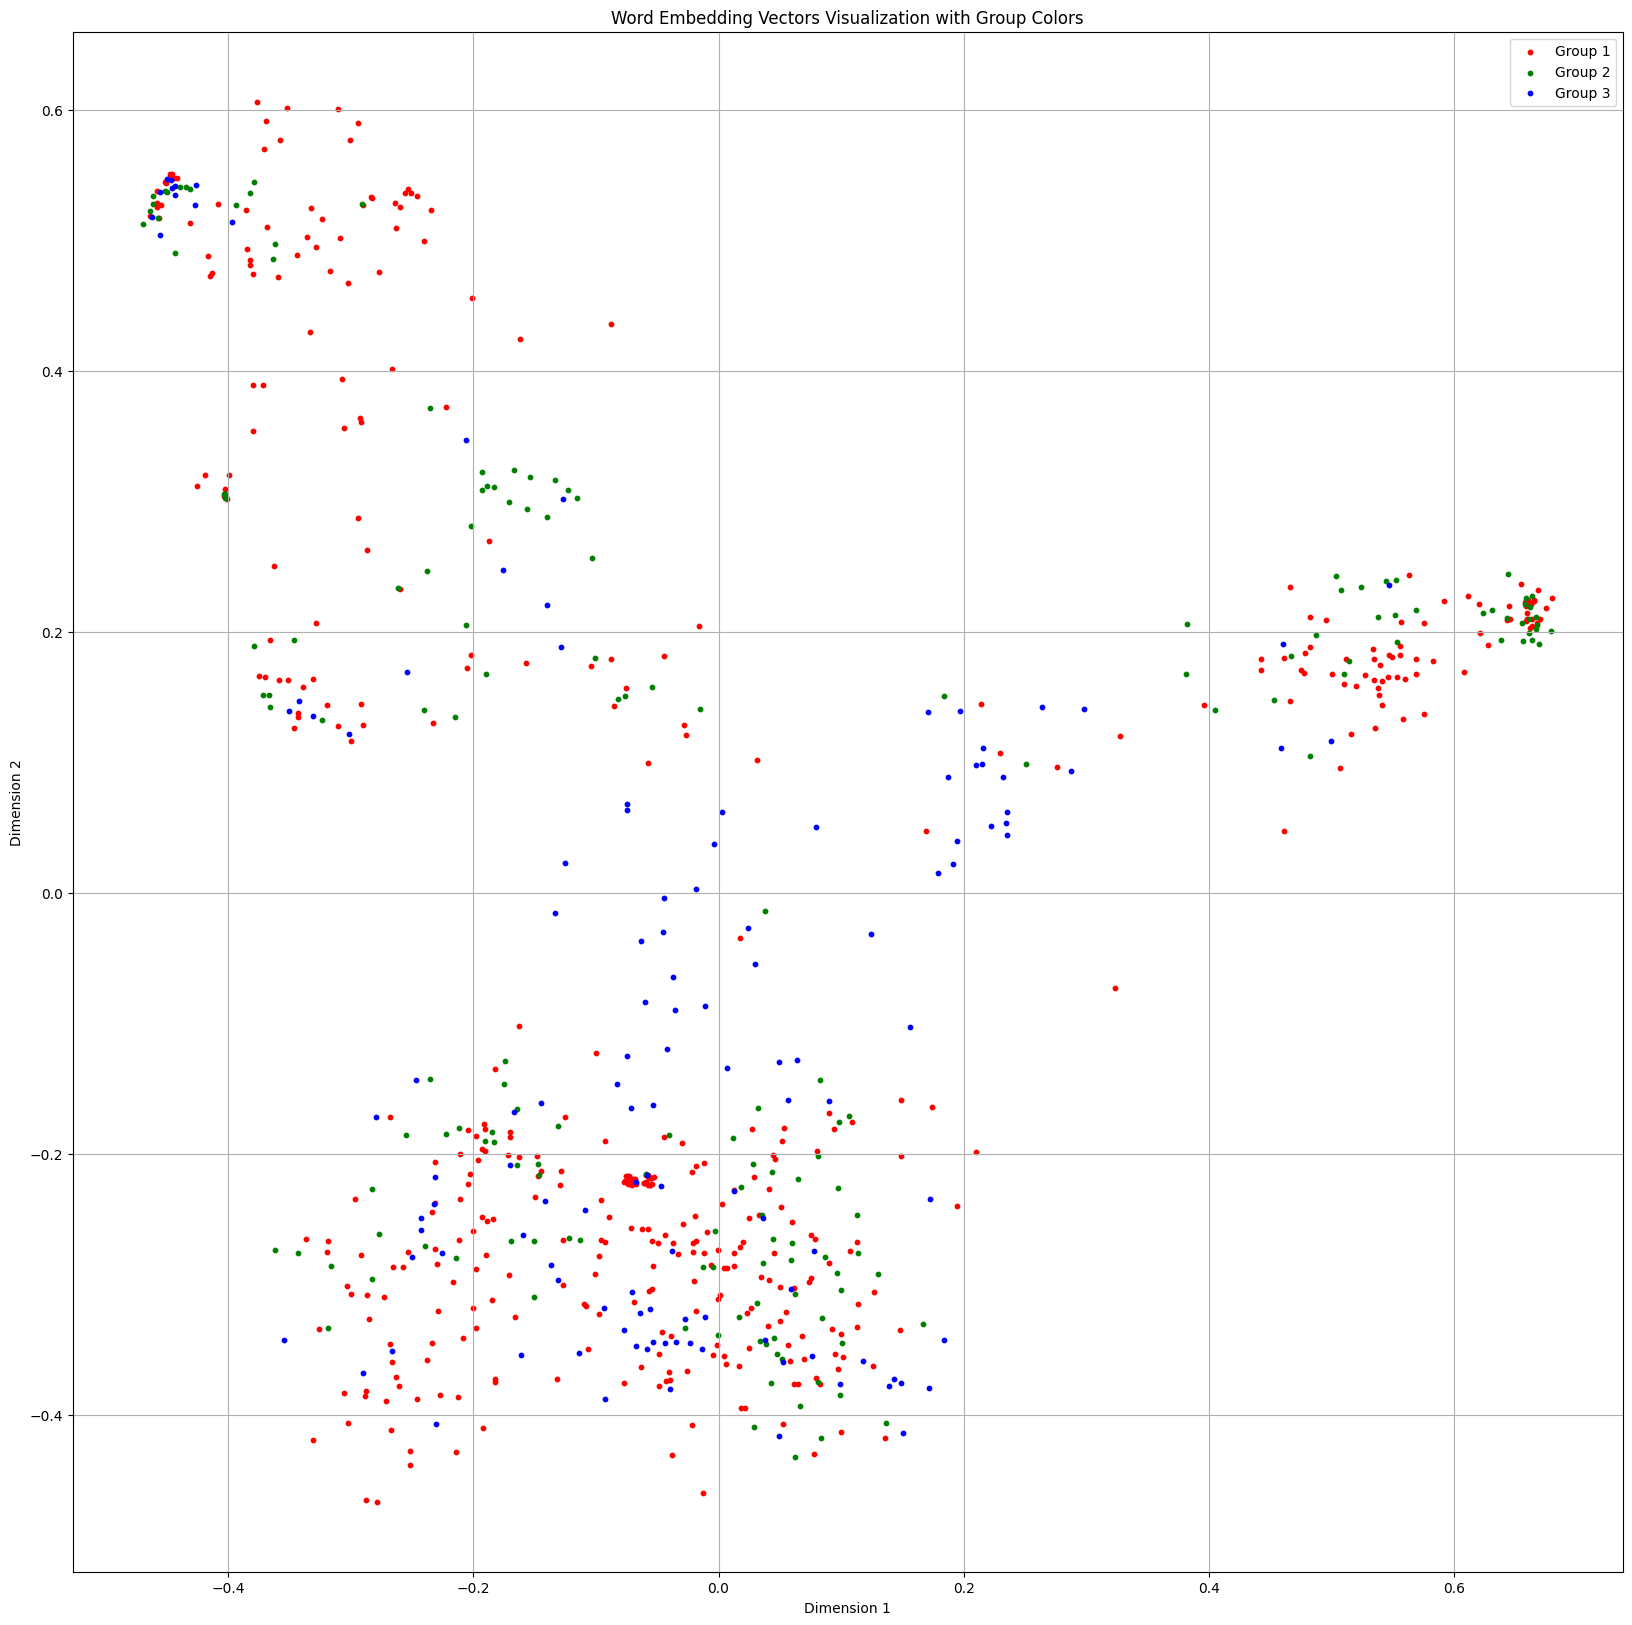

In [32]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [52]:
#Json file name
with open('/content/log2index') as f:
    logs = [line.strip() for line in f.readlines()]

print(len(logs))
print(logs[0])

736
ras kernel info instruction cache parity error corrected


In [53]:
model_glove = SentenceTransformer('sentence-transformers/average_word_embeddings_glove.6B.300d')
sentence_embeddings = model_glove.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 300)


In [54]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print(logs_embeddings_2d.shape)

(736, 2)


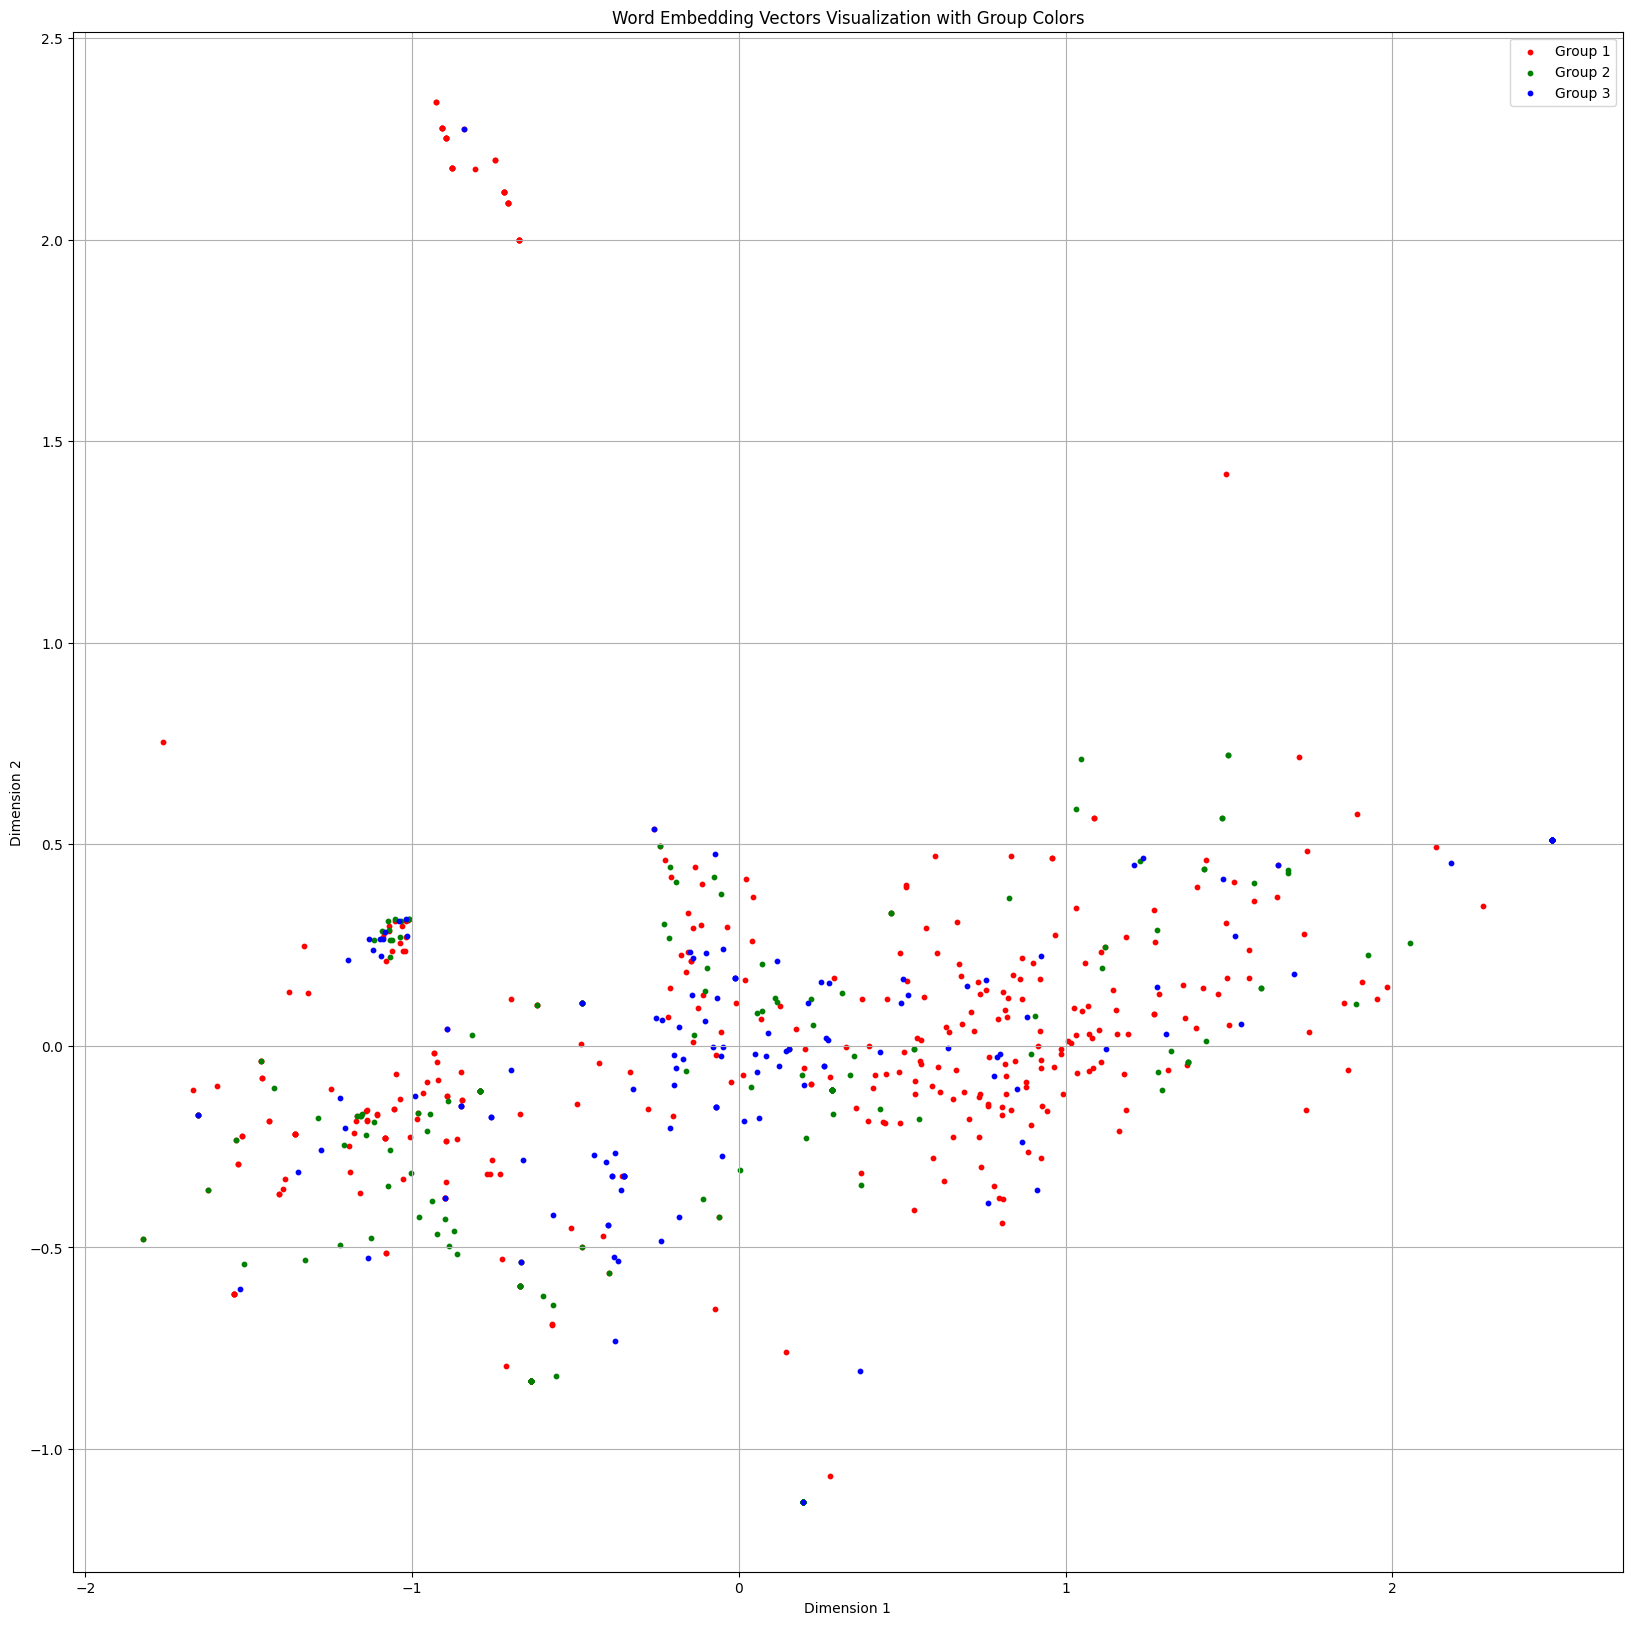

In [55]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# all-roberta-large-v1

In [59]:
model_roberta = SentenceTransformer('sentence-transformers/all-roberta-large-v1')
sentence_embeddings = model_roberta.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 1024)


In [60]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print(logs_embeddings_2d.shape)

(736, 2)


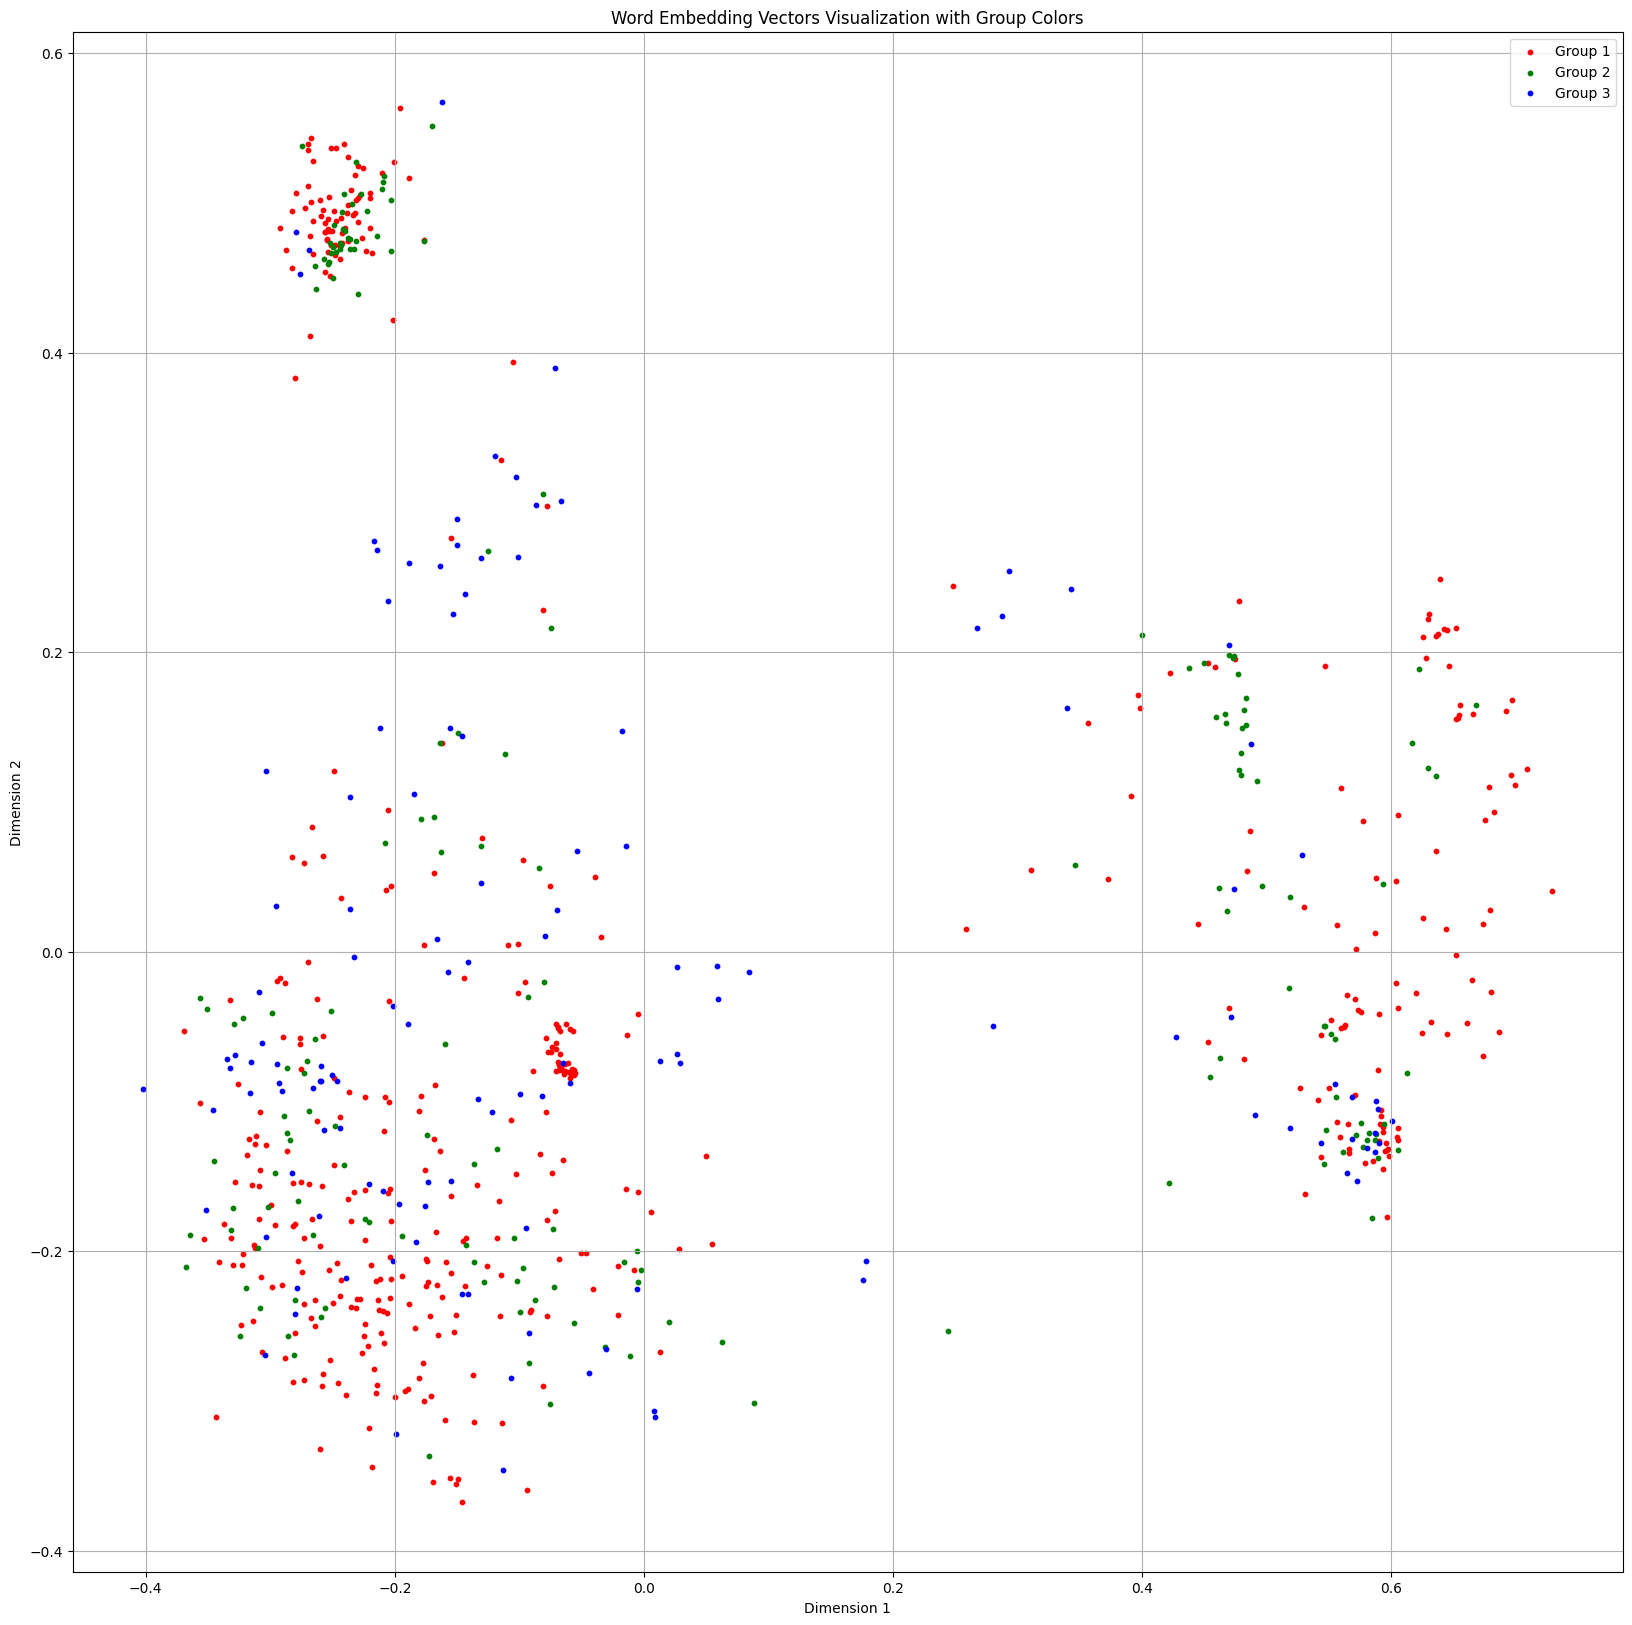

In [61]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# all-mpnet-base

In [62]:
model_mpnet = SentenceTransformer('sentence-transformers/all-mpnet-base-v1')
sentence_embeddings = model_mpnet.encode(logs,convert_to_numpy=True)
print(sentence_embeddings.shape)

(736, 768)


In [63]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings[:437])
logs_embeddings_2d = pca.transform(sentence_embeddings)
print(logs_embeddings_2d.shape)

(736, 2)


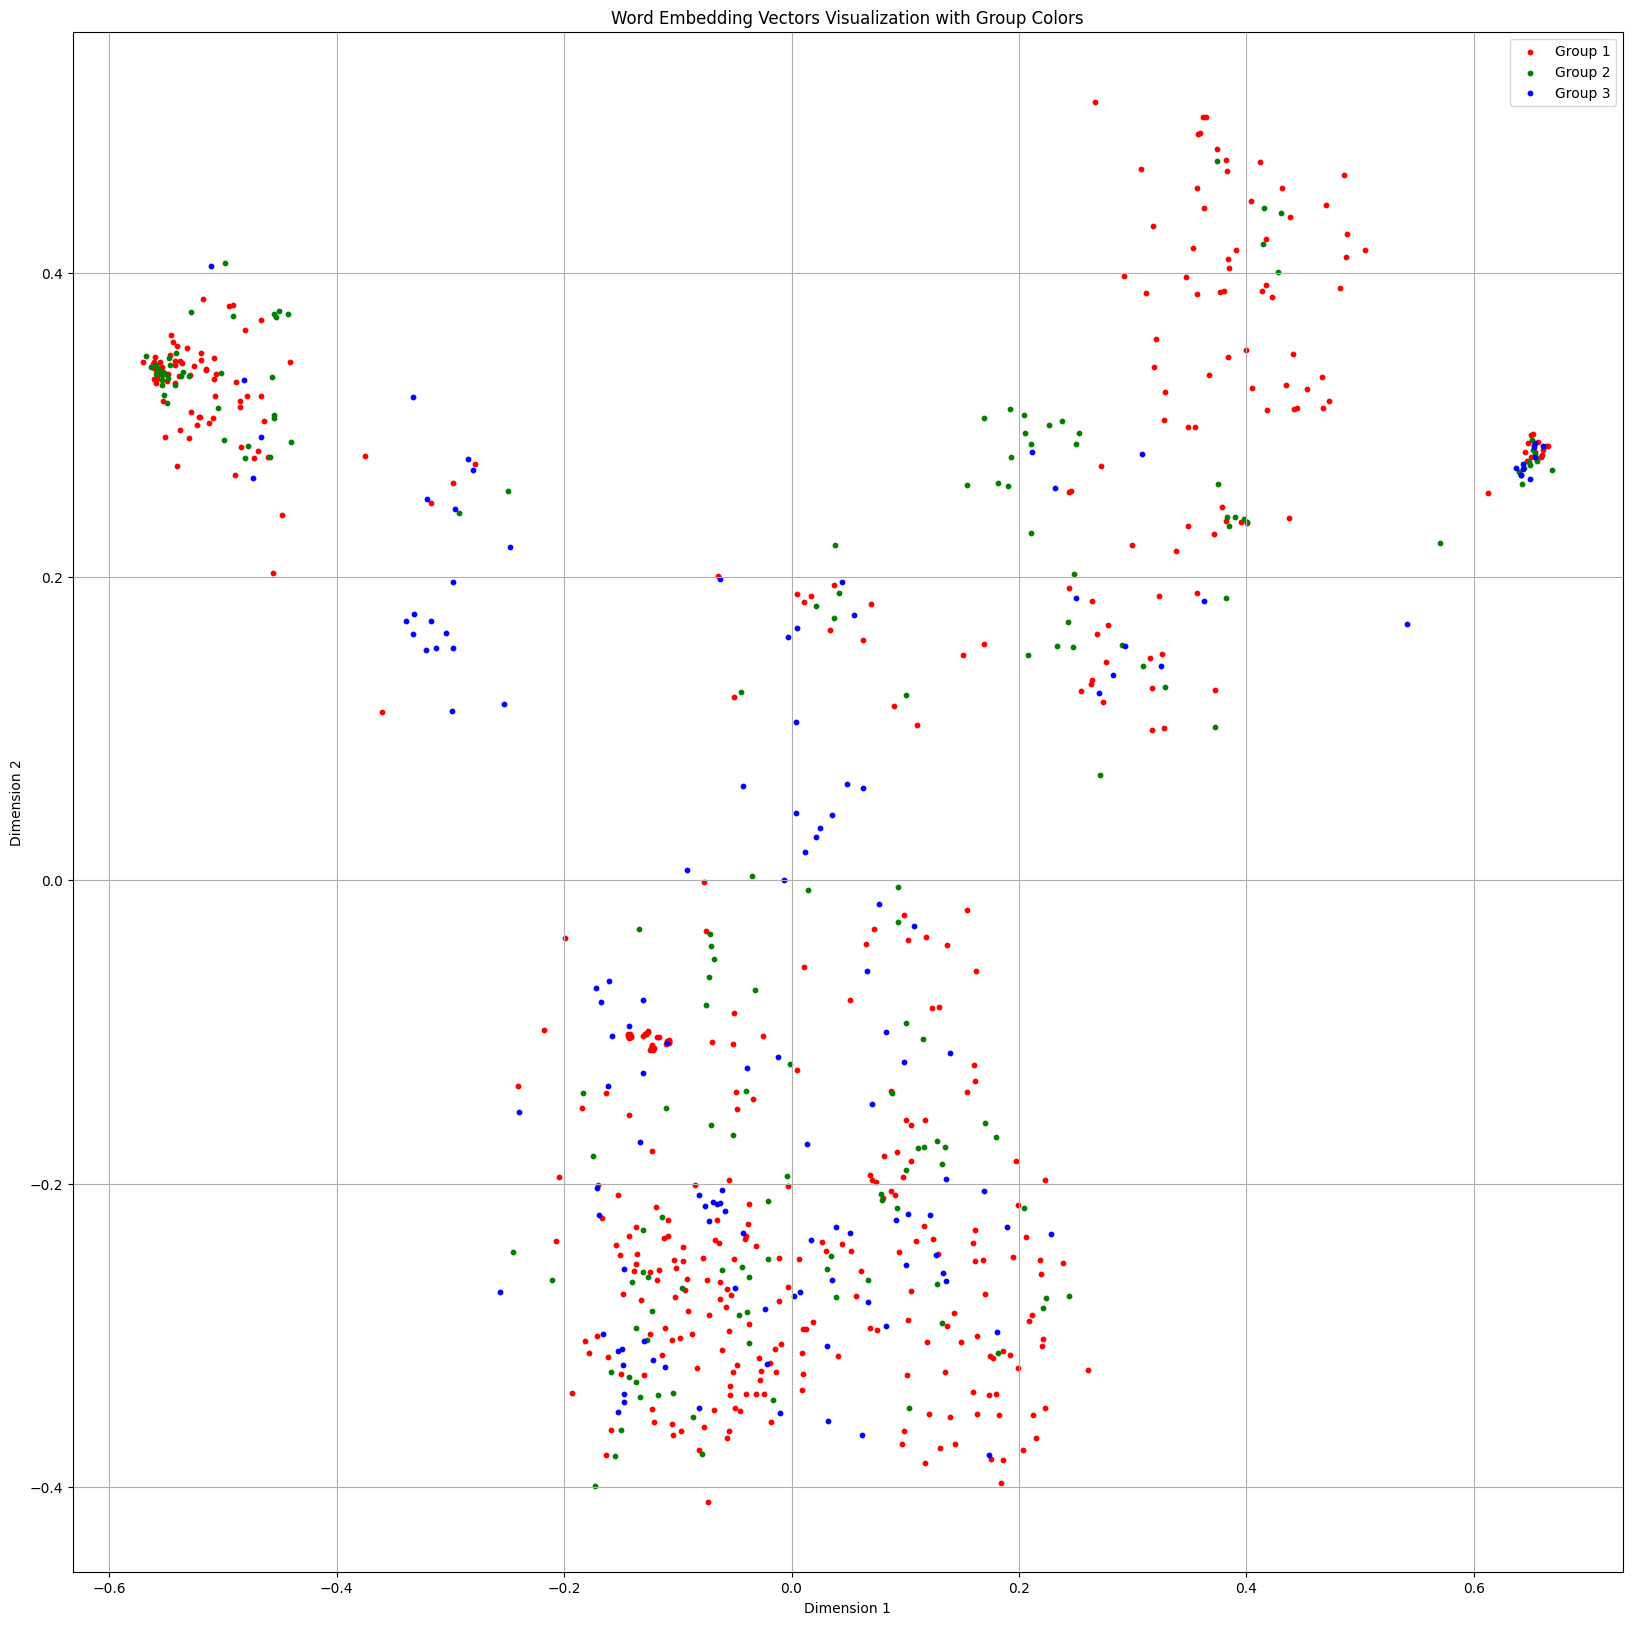

In [64]:

# Define colors for different groups
colors = ['red', 'green', 'blue']
index = [0,437,606,736]


# Create a scatter plot with different colors for each group
plt.figure(figsize=(20, 20))
for i, color in enumerate(colors):
    start_index = index[i]
    end_index = index[(i + 1)]
    plt.scatter(logs_embeddings_2d[start_index:end_index, 0], logs_embeddings_2d[start_index:end_index, 1],
                label=f'Group {i + 1}', c=color, marker='o', s=10)


# Annotate points with words (replace with your own words)
#log_numbers = []
#for i in range(len(logs_embeddings_2d)):
    #word = i # Create a log like "1", "2", ...
    #log_numbers.append(word)

#for i, log_number in enumerate(log_numbers):
    #plt.annotate(log_number, (logs_embeddings_2d[i, 0], logs_embeddings_2d[i, 1]))

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Vectors Visualization with Group Colors')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# fastText

https://huggingface.co/facebook/fasttext-an-vectors

In [ ]:
!pip install fasttext
import fasttext
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-an-vectors", filename="model.bin")
model_fastText = fasttext.load_model(model_path)

model_fastText['bread']


ERROR: Operation cancelled by user
